<a href="https://colab.research.google.com/github/FGalvao77/data-science-projects/blob/main/Prevendo_a_Demanda_de_Alugueis_de_Bicicletas_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prevendo a Demanda de Aluguéis de Bicicletas**

Os sistemas de compartilhamento de bicicletas são a nova geração de aluguel de bicicletas tradicionais, onde todo o processo de associação, aluguel e devolução se tornou automático.

Através desses sistemas, o usuário pode alugar facilmente uma bicicleta de uma posição específica e retornar para outra posição.

Atualmente, existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, compostos por mais de 500 mil bicicletas.

Hoje, existe um grande interesse nesses sistemas devido ao seu importante papel nos problemas de tráfego, ambientais e de saúde.

Ao contrário de outros serviços de transporte, como ônibus ou metrô, a duração da viagem, a partida e a posição de chegada são explicitamente registradas nesses sistemas.

Nesse artigo o nosso objetivo é testar diferentes tipos de algoritmos de regressão para prever a quantidade de bicicletas alugadas.

A ``Regressão`` é uma técnica que busca entender a relação de uma variável dependente(variável de resposta) com variáveis independentes, nesse tipo de problema o valor que iremos **predizer será sempre contínuo**.

Vamos utilizar um conjunto de dados que está disponível no repositório UCI
 - https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [ ]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [ ]:
# realizando o carregamento do conjunto de dados para google colab
from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving hour.csv to hour.csv


In [ ]:
# carregando e visualizando a base de dados
bike = pd.read_csv('hour.csv')
bike.head(10)   # as 10 primeiras linhas

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Entendendo a base de dados**

- ``instant``: índice de registro
- ``dteday``: data do aluguel (ano-mês-dia)
- ``season``: estação (1: inverno, 2: primavera, 3: verão, 4: outono)
- ``yr``: ano (0: 2011, 1: 2012)
- ``mnth``: mês (1 a 12)
- ``hr``: hora (0 a 23)
- ``holiday``: o dia com clima é feriado ou não (extraído de [Web Link])
- ``weekday``: dia da semana
- ``workingday``: se o dia não for final de semana nem feriado, for 1, caso contrário será 0 – equivalente ao dia útil.
- ``weathersit``: tempo
  - 1: limpo, poucas nuvens, parcialmente nublado, parcialmente nublado
  - 2: névoa + nublado, névoa + nuvens partidas, névoa + poucas nuvens, névoa
3: neve fraca, chuva fraca + trovoada + nuvens dispersas, chuva fraca + nuvens dispersas
  - 4: chuva forte + paletes de gelo + trovoada + névoa, neve + nevoeiro
- ``temp``: temperatura normalizada em graus Celsius. Os valores são derivados de (t-t_min) / (t_max-t_min), t_min = -8, t_max = + 39 (apenas na escala horária)
- ``atemp``: temperatura normal de sensação em graus Celsius. Os valores são derivados de (t-t_min) / (t_max-t_min), t_min = -16, t_max = + 50 (apenas na escala horária)
- ``hum``: umidade normalizada. Os valores são divididos em 100 (máximo)
windspeed: velocidade do vento normalizada. Os valores são divididos em 67 (máximo)
- ``casual``: número de usuários casuais
- ``registered``: número de usuários registrados
- ``cnt``: contagem do total de bicicletas alugadas, incluindo bicicletas casuais e registradas (variável target)

## **Análise de Dados e Pré-processamento de Dados**

In [ ]:
# informações estatísticas da base de dados
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Através dessa pequena análise já conseguimos 2 tipos de insights, o números de registros por coluna e a quantidade máxima e mínima de bicicletas alugadas.

In [ ]:
# contabilizando os valores ausentes somente do df_train e do nosso alvo
bike.isna().value_counts().sum()

17379

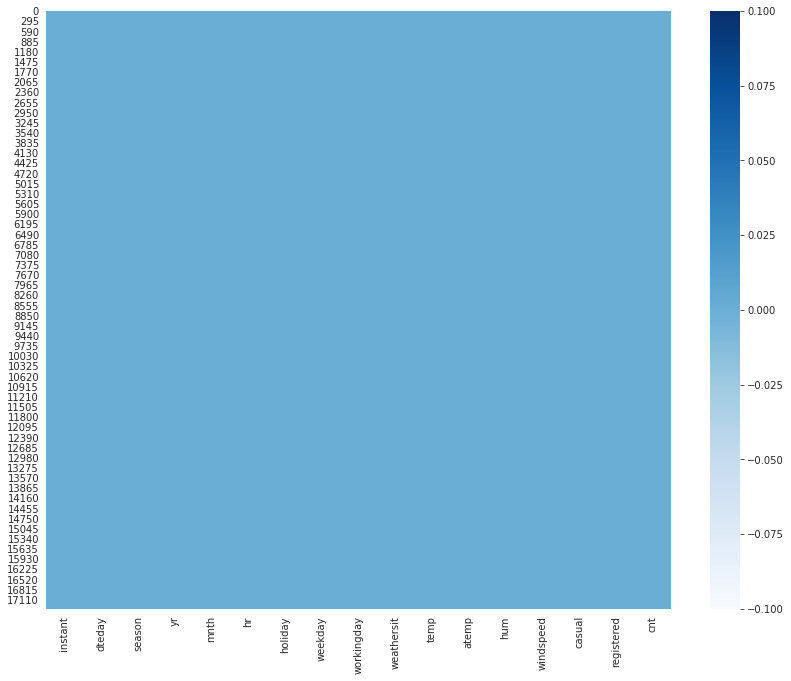

In [ ]:
# verificando se há valores nulos no df
# caso exista, haverá linhas brancas no gráfico
plt.figure(figsize=(14,11))
sns.heatmap(bike.isnull(), cmap='Blues', cbar=True);

In [ ]:
# aqui iremos visualizar a quantidade de dados ausentes proporcional a quantidade total de dados em cada coluna
total = bike.isnull().sum().sort_values(ascending = False)
percentual = (bike.isnull().sum()/bike.isnull().count()*100).sort_values(ascending = False)
faltantes  = pd.concat([total, percentual], axis=1, keys=['Total', 'Dados faltando (%)'])
faltantes.head(len(bike))     # visualizando em relação a quantidade de colunas na base de dados

,Total,Dados faltando (%)
cnt,0,0.0
weekday,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
hr,0,0.0
holiday,0,0.0
workingday,0,0.0
registered,0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


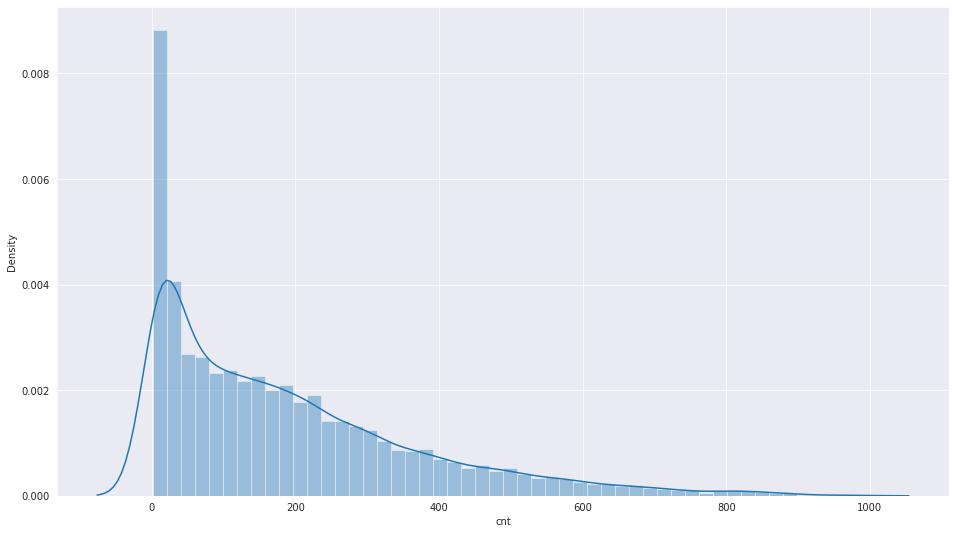

In [ ]:
# distribuição do atributo cnt
plt.figure(figsize=(16,9))
sns.set_style('darkgrid')
sns.distplot(bike['cnt']);

A distribuição dos dados dessa coluna está na faixa de 0 a 1000 com uma maior concentração entre as faixas de 0 a 200.

In [ ]:
# calculando a correlação entre as variáveis
bike.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Analisar com base nessa tabela fica um pouco complicado, não é impossível mas se temos alternativas por que não usar?

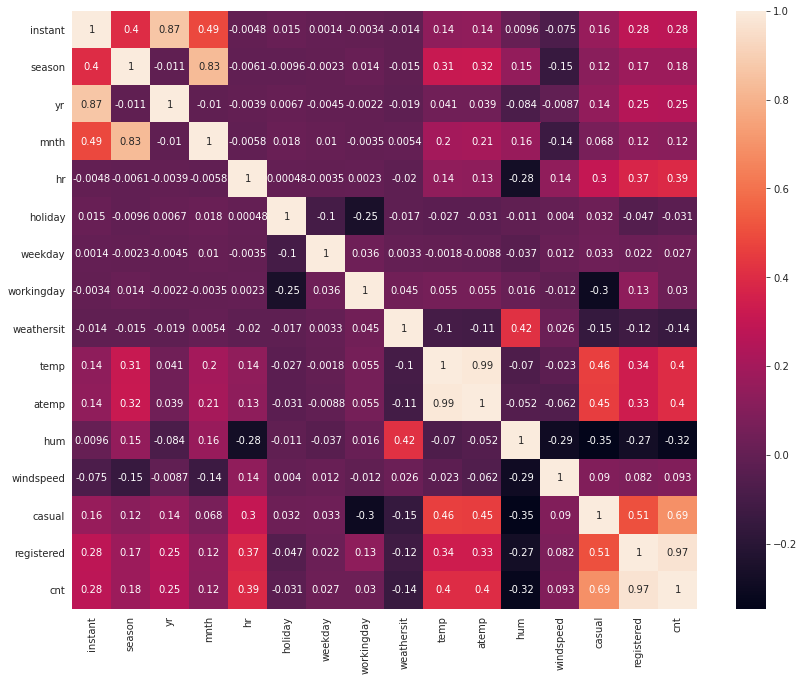

In [ ]:
# plotando gráfico de calor para uma melhor visualização da correlação do df_train
# aqui utilizaremos somentes as features selecionadas
corr = bike.corr()
ax = plt.subplots(figsize=(14, 11))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10});

In [ ]:
correlations = bike.corr()
correlations['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [ ]:
# vamos organizar a exibição de forma crescente
correlations = bike.corr()
correlations['cnt'].sort_values(ascending=False).head(len(bike))

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

A nossa intenção e saber o grau de correlação das variáveis com a variável que queremos prever (`cnt`), então podemos simplesmente filtrar a coluna com essas informações.

Vamos dar uma olhada mais uma vez na descrição da variável target:

``cnt``: contagem do total de bicicletas alugadas, incluindo bicicletas casuais e registradas.

Observe que cnt já inclui os valores de usuários casuais e registrados, então não faz sentindo manter essas 2 variáveis , pois esses dados são redundantes.

## **Excluindo os atributos que são subcategorias do atributo alvo: casual, registered e do tipo date**

Também precisamos excluir a variável dteday que é do tipo date, os algoritmos de regressão não aceitam esse tipo de dado, e ela representa apenas a data do evento e não vai contribuir em nada para o modelo.

Na variável `columns` iremos guardar as nossas **features**, então precisamos excluir também a variável target (`cnt`).

In [ ]:
columns = bike.columns.drop(['cnt', 'casual', 
                             'dteday', 'registered'])
columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

Perfeito! Já temos as features que iremos usar para treinar os algoritmos.

## **Utilizando Machine Learning para realizar a previsão**

In [ ]:
# importando o método train_test_split 
# para realizar a separação aleatória dos dados de treino e teste
from sklearn.model_selection import train_test_split

In [ ]:
# separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(bike[columns],
                                                    bike['cnt'], 
                                                    test_size=0.20, 
                                                    random_state=42)

Passamos as features que serão os dados de treino, a variável target e especificamos que 80% desses dados serão usados para treino e 20% para teste.

O ``random_state`` (semente aleatória) garante que você tenha o mesmo resultado que foi apresentado aqui quando você for fazer o experimento na sua máquina.

Agora vamos começar a testar os nossos modelos, o primeiro deles será o de ``regressão linear`` que é o tipo mais básico.

In [ ]:
# instanciando o algoritmo na variável lr
lr = LinearRegression()

In [ ]:
# treinando o algoritmo e gerando o modelo de regressão
model = lr.fit(X_train, y_train)

# realizando a predição
result = model.predict(X_test)

Entregamos os dados do conjunto de teste para o modelo fazer a predição e guardamos os resultados na variável resultado.

In [ ]:
# calculando o erro médio quadrático
mean_squared_error(y_test, result)

19376.952766955474

O ``mean_squared_error`` é a diferença média quadrática entre o valor predito e o valor real, quanto menor for esse valor mais próximo o modelo está de acertar.

In [ ]:
# computando o score
model.score(X_test, y_test)

0.3880719703569244

O valor dessa ``métrica`` varia entre 0 e 1, indicando em percentagem, o quanto o modelo consegue explicar os valores observados. Quanto maior esse valor , mais explicativo é o modelo.

In [ ]:
# comparando os resultados aplicando os dados de treinamento
result_train = model.predict(X_train)
mean_squared_error(y_train, result_train)

20292.14100917642

In [ ]:
model.score(X_train, y_train)

0.38882636769645695

Nesse primeiro modelo temos um erro muito alto e um valor de score muito baixo, esses resultados não são nem um pouco satisfatórios.

Um dos motivos é que temos muitos dados binários no conjunto de dados (0 e 1), os modelos de regressão linear tendem a funcionar melhor quando temos dados numéricos contínuos.

Os modelos de árvore apresentam melhores resultados, vamos ver a seguir se essa premissa se confirma.

## **Testando os resultados utilizando um modelo baseado em Árvore de Decisão**

Vamos fazer os mesmos processos alterando apenas o tipo de modelo.

In [ ]:
# instanciando o algoritmo
tree = DecisionTreeRegressor()

In [ ]:
# treinando o algoritmo e gerando o modelo
model_tree = tree.fit(X_train, y_train)
result_tree = tree.predict(X_test)

In [ ]:
# calculando o erro médio quadrático
mean_squared_error(y_test, result_tree)

3482.2333141542003

Olha como o valor de erro já diminuiu em comparação com o modelo anterior.

In [ ]:
# computando o score
model_tree.score(X_test, y_test)

0.8900303780312789

Os resultados são bem melhores e já conseguimos cumprir o objetivo de diminuir o valor do erro e ter um score mais alto e validar a hipótese de que esse tipo de modelo tende a ser superior para o tipo de dado que estamos trabalhando.

## **Melhorando os resultados utilizando o Random Forest**

Apesar dos ótimos resultados que tivemos com a árvore de decisão o nosso modelo pode estar sofrendo ``overfitting`` (sobreajuste).

Os modelos ensembles como o Random forest tem a missão de resolver esse tipo de problema e por isso apresentam resultados ainda mais satisfatórios.

Seu funcionamento é bem simples, ele usa várias árvores de decisão e pega o valor que cada uma das árvores, o resultado final vai ser o valor médio dessas árvores.

Seguiremos com os processos já detalhados anteriormente.

In [ ]:
# instanciando o algoritmo
tree_rf = RandomForestRegressor()

In [ ]:
# treinando o algoritmo e gerando o modelo
model_rf = tree_rf.fit(X_train, y_train)
result_rf = model_rf.predict(X_test)

In [ ]:
# calculando o erro médio quadrático
mean_squared_error(y_test, result_rf)

1666.9743313003453

In [ ]:
# computando o score
model_rf.score(X_test, y_test)

0.9473566184380766

Excelente não acha? Como já esperávamos os resultados são ainda mais surpreendentes.

Mas reforçando o que já foi dito, não é sempre que esse tipo de modelo dará os melhores resultados, tudo vai depender dos dados analisados.

## **Ajustando os hiperparametros do Random Forest**

Todos os modelos testados até o momento foram instanciados na sua forma mais básica sem nenhum ajuste de parâmetro.

Já temos o modelo que apresenta os melhores resultados e agora a meta e tentar encontrar os melhores parâmetros.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# especificando os parâmetros de tunning
params = {'min_samples_leaf': [1,10],
          'min_samples_split': [2,10],
          'n_estimators': [100,250,600,1400]}

De acordo com a documentação do sklearn - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.

- ``min_samples_leaf`` é o número mínimo de amostras necessárias para estar em um nó folha;

- ``min_samples_split`` é o número mínimo de amostras necessárias para dividir um nó interno eo,

- ``n_estimators`` é o número de árvores que será gerada.

In [ ]:
# instanciando o RandomForest e o GridSearchCV
rf = RandomForestRegressor()
grid = GridSearchCV(rf, params)

Para o grid passamos o modelo e os parâmetros que definimos para que ele faça os testes exaustivos.

In [ ]:
# executando o grid
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

Quando estiver executando essa parte do código tenha paciência esse processo é um pouco demorado mesmo.

In [ ]:
# verificando os melhores parâmetros
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1400}

Essa é a melhor configuração que ele encontrou.

In [ ]:
# recuperando o melhor estimator
rf_best = grid.best_estimator_

In [ ]:
# gerando o resultado final
result_final = rf_best.predict(X_test)

Utilizamos os melhores parâmetros encontrados para fazer a predição.

In [ ]:
# calculando o erro médio quadrático
mean_squared_error(y_test, result_final)

1620.476656877187

O erro foi ainda menor que o anterior que era de aproximadamente 1680.

In [ ]:
# computando o score
rf_best.score(X_test, y_test)

0.9488250242619928

Esse é o score do nosso modelo final, uma grande evolução nos resultados.

## **Aula de Regressão**
- https://youtu.be/m8FrAx42okI

## **Conclusão**

Testamos alguns algoritmos de regressão e analisamos os seus respectivos resultados, esse era o nosso principal objetivo.

Por essa razão decidimos não nos aprofundar muito na parte pré-processamento dos dados.

Existem inúmeras técnicas que você podemos e devemos testar, como a ``normalização das features`` por exemplo.

Você já tem a base agora use e abuse dos experimentos, afinal esse é o trabalho do Cientista de Dados.